In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import chromo
from particle import Particle

In [2]:
event_kin = chromo.kinematics.FixedTarget(1e12, (56, 26), (40, 18))
event_generator = chromo.models.DpmjetIII193(event_kin)

 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.3.5                       |
 |                                                                       |
 |                      (Last change:  16 Jan 2023)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch (ASIoP)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)                 |
 |                                                                       |
 |        https://github.com/afedynitch/dpmjet                           |
 |                       

In [3]:
all_particles_list = Particle.findall()
all_particles_dict = {p.pdgid: p for p in all_particles_list}
plist = [int(p) for p in all_particles_dict.keys()]

In [4]:
energy = np.geomspace(1e0, 1e10, 10, dtype='float64')

In [98]:
air = chromo.util.CompositeTarget([("N", 0), ("O", 1)])
event_kin = chromo.kinematics.FixedTarget(1e4, 2212, air)
event_generator.set_cross_section_precision()
print(event_generator.get_cross_section_precision())
print(event_generator.cross_section(event_kin))

1000
CrossSectionData(total=nan, inelastic=347.8083650679298, elastic=nan, diffractive_xb=nan, diffractive_ax=nan, diffractive_xx=nan, diffractive_axb=nan)


In [68]:

air = chromo.util.CompositeTarget([("N", 1), ("O", 0)])
# (14, 7)

def get_total_cs(target):
    def total_cs(energy):
        event_kin = chromo.kinematics.FixedTarget(energy, 2212, target)
        try:
            event_generator.set_cross_section_precision()
            return np.float64(event_generator.cross_section(event_kin).inelastic)
        except:
            return np.float64(np.nan)
    
    return total_cs    
    

total_cs_fun = np.frompyfunc(lambda x : get_total_cs(air)(x), 1, 1)
cs = total_cs_fun(energy).astype('float64')     

total_cs_fun = np.frompyfunc(lambda x : get_total_cs((14, 7))(x), 1, 1)
cs_n = total_cs_fun(energy).astype('float64')  

total_cs_fun = np.frompyfunc(lambda x : get_total_cs((16, 8))(x), 1, 1)
cs_o = total_cs_fun(energy).astype('float64') 

In [64]:
longer_pi0 = ([130, 211, 310, 321, 411, 421, 431,
               511, 521, 531, 541, 2112, 2212, 3112,
               3122, 3222, 3312, 3322, 3334, 4122,
               4132, 4232, 4332, 5122, 5132, 5232, 5332])

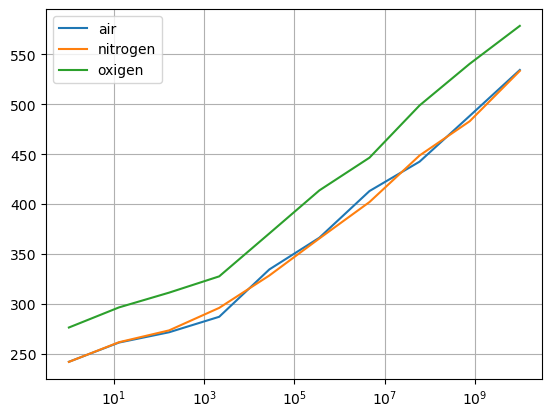

In [69]:
plt.semilogx(energy, cs, label="air")
plt.semilogx(energy, cs_n, label="nitrogen")
plt.semilogx(energy, cs_o, label="oxigen")
plt.grid()
plt.legend()